# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [2]:
survey = pd.read_csv("kaggle_survey_2020_responses.csv", skiprows = [1], low_memory=False)

In [3]:
survey.drop(survey.columns[0], axis=1, inplace=True)

In [4]:
survey.rename(columns={"Q1": "Age", "Q2": "Gender", "Q3": "Country", "Q4": "Education", "Q5": "Occupation", "Q6": "Coding Experience"}, inplace=True)
survey

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20033,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [5]:
row_number = survey.shape[0]

survey.dropna(subset=['Education', 'Occupation', 'Coding Experience'], inplace=True)

new_row_number = survey.shape[0]

print(row_number - new_row_number, " satır silindi.")

916  satır silindi.


In [6]:
print("Satır: {} Sütun: {}".format(survey.shape[0], survey.shape[1]))

Satır: 19120 Sütun: 354


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

<AxesSubplot:ylabel='Age'>

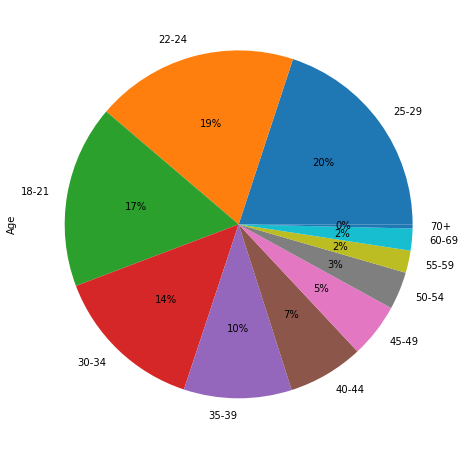

In [7]:
survey['Age'].value_counts().plot(kind="pie", figsize=(8,8), autopct='%0.0f%%')

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [8]:
survey_tr = survey.loc[survey['Country'] == "Turkey"]

survey_tr_edu = survey_tr['Education'].groupby(survey_tr['Education']).count()

survey_tr_edu

Education
Bachelor’s degree                                                    129
Doctoral degree                                                       50
I prefer not to answer                                                 8
Master’s degree                                                      111
No formal education past high school                                   3
Professional degree                                                    6
Some college/university study without earning a bachelor’s degree     15
Name: Education, dtype: int64

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [9]:
grouped = survey.groupby(['Age'])

df = grouped['Occupation'].apply(lambda x: x.mode())

df = df.droplevel(1)

df

Age
18-21           Student
22-24           Student
25-29           Student
30-34    Data Scientist
35-39    Data Scientist
40-44    Data Scientist
45-49             Other
50-54             Other
55-59             Other
60-69             Other
70+      Data Scientist
Name: Occupation, dtype: object

## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

In [10]:
filtered = survey.filter(regex='^Q7', axis=1)   #7.soruyla ilgili sütunları filtreleme

pl_df = filtered.describe()

#describe() fonksiyonuyla elde ettiğimiz verilerden yeni bir dataframe oluşturma
new_df = pd.DataFrame({'Count': pl_df.loc['count'].values}, index=pl_df.loc['top'])

new_df.sort_values('Count', ascending=False, inplace=True)

new_df

,Count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


In [11]:
data_scientists_df = survey.loc[survey['Occupation'] == "Data Scientist"]

data_scientists_df = data_scientists_df.filter(regex='^Q7', axis=1)

data_scientists_df = data_scientists_df.describe()

ds_df = pd.DataFrame({'Count': data_scientists_df.loc['count'].values}, index=data_scientists_df.loc['top'])

ds_df.sort_values('Count', ascending=False, inplace=True)

ds_df

,Count
top,
Python,2453
SQL,1473
R,975
Bash,405
C++,323
Java,305
Javascript,290
C,247
Other,245


<AxesSubplot:title={'center':'Programming languages data scientists use'}, xlabel='top'>

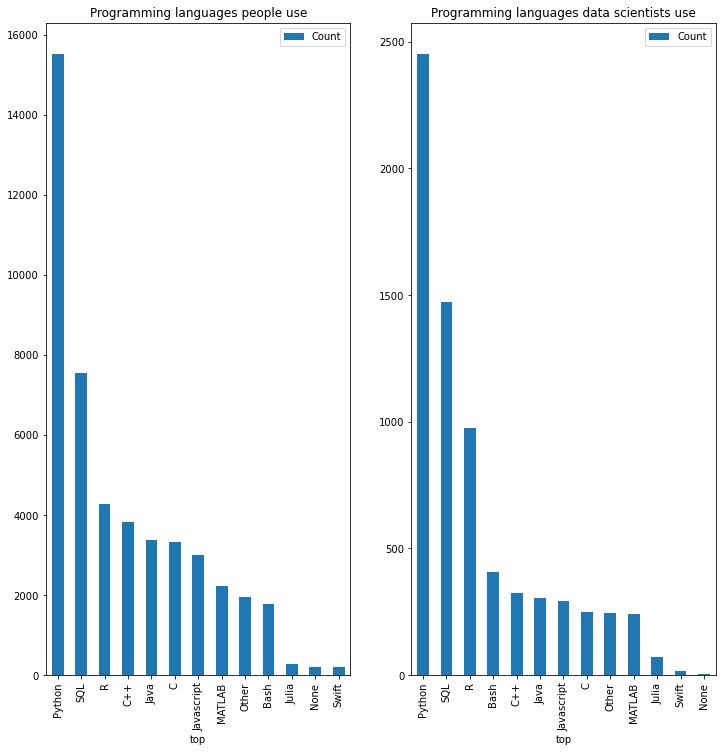

In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,12))

ax1.set_title("Programming languages people use")

ax2.set_title("Programming languages data scientists use")

new_df.plot.bar(ax=ax1)

ds_df.plot.bar(ax=ax2)

## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

<AxesSubplot:>

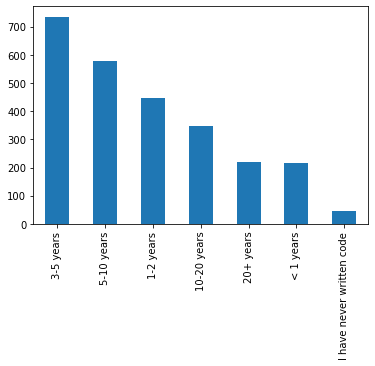

In [13]:
df = survey.loc[survey['Occupation'] == "Data Scientist"]

df = df.loc[df['Q15'] != "I do not use machine learning methods"]

df['Coding Experience'].value_counts().plot.bar()

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [14]:
sci_df = survey.filter(regex='^Q1(6|7)', axis=1).copy()  #16. ve 17.sorularla ilgili sütunları filtreleme

sci_df.dropna(subset=['Q16_Part_1'], inplace=True) #Scikit-learnle ilgili sütundaki nan değerleri silme

sci_df = sci_df.filter(regex='^Q17', axis=1)  #sadece 17.soruyla ilgili sütunlar kalacak şekilde filtereleme 

sci_df = sci_df.describe()

sci_df = pd.DataFrame({'Count': sci_df.loc['count'].values}, index=sci_df.loc['top'])

sci_df.sort_values('Count', ascending=False, inplace=True)

sci_df

,Count
top,
Linear or Logistic Regression,8382
Decision Trees or Random Forests,7340
Convolutional Neural Networks,4679
"Gradient Boosting Machines (xgboost, lightgbm, etc)",4507
Bayesian Approaches,2886
Recurrent Neural Networks,2795
"Dense Neural Networks (MLPs, etc)",2739
"Transformer Networks (BERT, gpt-3, etc)",1064
Generative Adversarial Networks,792


In [15]:
survey.filter(regex='^Q16', axis=1).iloc[:,:3].describe()[2:]

,Q16_Part_1,Q16_Part_2,Q16_Part_3
top,Scikit-learn,TensorFlow,Keras
freq,10250,6934,6192


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını ***(aralık olmayan değerler için ifadedeki değeri)*** maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [16]:
import re
import statistics

def interval_to_mean(row): #Maaş sütunundaki gereksiz karakterleri temizleyerek aralığın ortalamasını alır
    
        row = str(row).replace(",", "").replace("-", " ").replace("$", "")

        list_of_nums = list(map(int,re.findall(r'\d+', row)))

        return statistics.mean(list_of_nums)

In [17]:
survey['ConvertedComp'] = survey['Q24'].apply(lambda x: interval_to_mean(x) if pd.notnull(x) else x)

grouped = survey.groupby(['Occupation'])

grouped = grouped.apply(lambda x: x.ConvertedComp.mean())

grouped.sort_values(ascending=False, inplace=True)

grouped = pd.DataFrame({'Occupation': grouped.index, 'ConvertedComp': grouped.values})

print("Ortalama yıllık maaşı en yüksek olan meslek: {}\n".format(grouped.Occupation.iloc[0]))

ds_rank = grouped.loc[grouped['Occupation'] == 'Data Scientist'].ConvertedComp.index[0]+1

print("Data Science {}.sırada".format(ds_rank))

Ortalama yıllık maaşı en yüksek olan meslek: Product/Project Manager

Data Science 2.sırada


In [18]:
df= survey.loc[survey['Occupation'] == "Data Scientist"]

df = df.groupby(['Country'])

df = df.apply(lambda x: x.ConvertedComp.mean())

df.sort_values(ascending=False, inplace=True)

df.iloc[:10]

Country
United States of America                                142609.330110
Israel                                                  111979.520000
Switzerland                                             109230.269231
Australia                                               104318.958333
United Kingdom of Great Britain and Northern Ireland     89749.504587
Germany                                                  79804.195312
Ireland                                                  78499.500000
Singapore                                                76937.000000
Canada                                                   74466.481132
Thailand                                                 73707.875000
dtype: float64

In [19]:
compdf = survey.loc[~survey['Q20'].isin(['0-49 employees','50-249 employees'])]

print("250’den fazla kişi çalışan kurumdakilerin ortalama maaşı:", compdf.ConvertedComp.mean())

250’den fazla kişi çalışan kurumdakilerin ortalama maaşı: 56410.82901998097


In [20]:
grouped = compdf.groupby('Q20')

grouped.apply(lambda x: x.ConvertedComp.mean())

Q20
10,000 or more employees    62303.713274
1000-9,999 employees        55084.827184
250-999 employees           48664.562934
dtype: float64

In [21]:
group_df = survey.groupby(survey['Country'])

comp_mean = group_df['ConvertedComp'].mean()

comp_std = group_df['ConvertedComp'].std()

comp_median = group_df['ConvertedComp'].median()

stat_df = pd.DataFrame({'Country': comp_mean.index, 'mean': comp_mean.values, 'std': comp_std.values, 'median': comp_median.values})

stat_df.sort_values('mean',ascending=False, inplace=True)

stat_df.reset_index(drop=True, inplace=True)

stat_df

,Country,mean,std,median
0,United States of America,120321.619272,85088.163171,112499.5
1,Switzerland,120051.583333,54795.290175,112499.5
2,Israel,109757.328125,101749.997198,94999.5
3,Australia,87807.329932,70029.059912,84999.5
4,United Kingdom of Great Britain and Northern I...,82429.511429,77980.660312,64999.5
5,Germany,73634.271484,64869.140664,64999.5
6,Canada,73563.896465,55076.938245,74999.5
7,Netherlands,70603.482301,38504.894831,64999.5
8,United Arab Emirates,65777.277778,57151.792062,64999.5
9,Sweden,60767.681818,33930.786528,54999.5


In [22]:
print("Türkiye {}.sıradadır".format(stat_df[stat_df['Country'] == "Turkey"].index[0]+1))

Türkiye 40.sıradadır


In [23]:
stat_df.loc[stat_df['Country'] == "Turkey"]

,Country,mean,std,median
39,Turkey,16692.274096,43730.238109,8749.5


## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

In [24]:
lisans_df = survey.loc[survey['Education'] == 'Bachelor’s degree']

yuksek_lisans_df = survey.loc[survey['Education'] == 'Master’s degree']

doktora_df = survey.loc[survey['Education'] == 'Doctoral degree']

new_index = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']

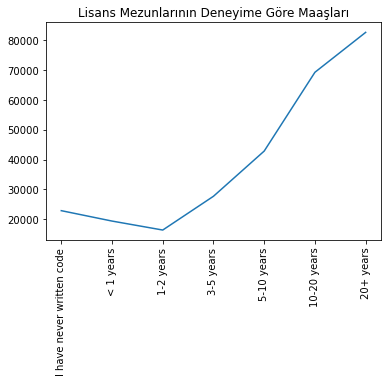

In [25]:
lisans_grup = lisans_df.groupby(['Coding Experience'])

lisans_grup = lisans_grup.apply(lambda x: x.ConvertedComp.mean())

lisans_grup = lisans_grup.reindex(new_index)

plt.title('Lisans Mezunlarının Deneyime Göre Maaşları')

plt.xticks(rotation='vertical')

plt.plot(lisans_grup)

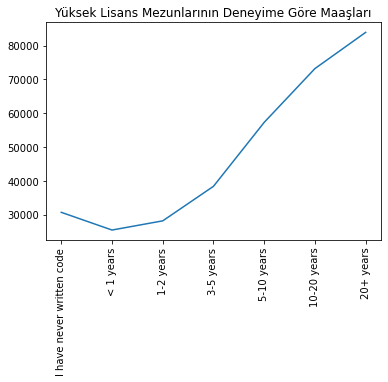

In [26]:
yuksek_lisans_grup = yuksek_lisans_df.groupby(['Coding Experience'])

yuksek_lisans_grup = yuksek_lisans_grup.apply(lambda x: x.ConvertedComp.mean())

yuksek_lisans_grup = yuksek_lisans_grup.reindex(new_index)

plt.title('Yüksek Lisans Mezunlarının Deneyime Göre Maaşları')

plt.xticks(rotation='vertical')

plt.plot(yuksek_lisans_grup)

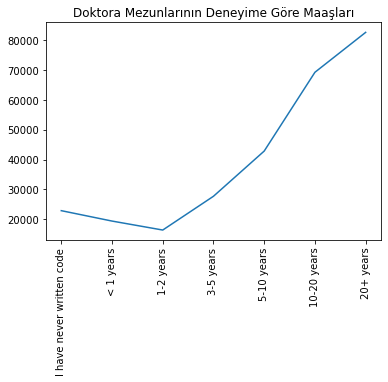

In [27]:
doktora_grup = lisans_df.groupby(['Coding Experience'])

doktora_grup = doktora_grup.apply(lambda x: x.ConvertedComp.mean())

doktora_grup = doktora_grup.reindex(new_index)

plt.title('Doktora Mezunlarının Deneyime Göre Maaşları')

plt.xticks(rotation='vertical')

plt.plot(doktora_grup)

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

<AxesSubplot:ylabel='Occupation'>

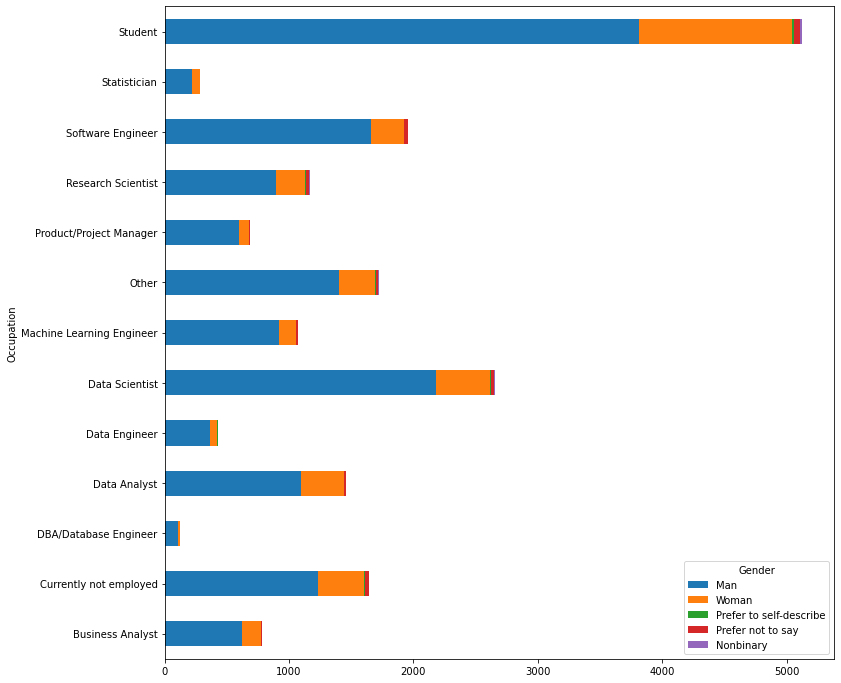

In [28]:
bar = survey.groupby(['Occupation','Gender'])['Occupation'].count().unstack('Gender')

bar[survey['Gender'].unique()].plot.barh(figsize=(12,12), stacked=True)

In [29]:
bar

Gender,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Occupation,,,,,
Business Analyst,620.0,2.0,11.0,1.0,152.0
Currently not employed,1231.0,4.0,30.0,7.0,373.0
DBA/Database Engineer,103.0,2.0,4.0,NaN,16.0
Data Analyst,1098.0,1.0,11.0,4.0,343.0
Data Engineer,364.0,NaN,7.0,1.0,60.0
Data Scientist,2180.0,8.0,26.0,8.0,437.0
Machine Learning Engineer,917.0,NaN,14.0,4.0,135.0
Other,1405.0,2.0,20.0,4.0,289.0
Product/Project Manager,597.0,1.0,8.0,2.0,78.0


In [30]:
bar['Sum'] = bar.apply(lambda x: x.sum(), axis=1)

print("Her meslek için kadın oranı (Yüzde)")

(bar['Woman'] / bar['Sum'] * 100).sort_values(ascending=False)

Her meslek için kadın oranı (Yüzde)


Occupation
Student                      24.029647
Statistician                 23.693380
Data Analyst                 23.541524
Currently not employed       22.674772
Research Scientist           20.308483
Business Analyst             19.338422
Other                        16.802326
Data Scientist               16.434750
Data Engineer                13.888889
Software Engineer            13.272078
DBA/Database Engineer        12.800000
Machine Learning Engineer    12.616822
Product/Project Manager      11.370262
dtype: float64

In [31]:
women_count = bar.Woman.sum()
men_count = bar.Man.sum()

not_employed_women = bar.loc['Currently not employed'].Woman
not_employed_men = bar.loc['Currently not employed'].Man

print("Şu anda çalışmayan kadın oranı: %", (not_employed_women / women_count) * 100)
print("Şu anda çalışmayan erkek oranı: %", (not_employed_men / men_count) * 100)

Şu anda çalışmayan kadın oranı: % 10.13586956521739
Şu anda çalışmayan erkek oranı: % 8.15285780515266


## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

In [32]:
women_df = survey.loc[survey['Gender'] == "Woman"]

exp_women_df = women_df.loc[~women_df['Coding Experience'].isin(['< 1 years','1-2 years'])]

grouped = exp_women_df.groupby(survey['Country'])

grouped = grouped.apply(lambda x: x.Gender.count())

print("Kadın katılımcı sayısının en yüksek olduğu ülke:",grouped.idxmax())

Kadın katılımcı sayısının en yüksek olduğu ülke: India


<AxesSubplot:ylabel='Education'>

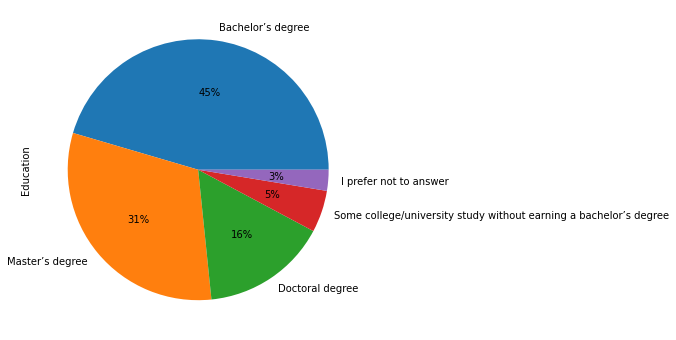

In [33]:
survey_tr_women = women_df.loc[women_df['Country'] == "Turkey"]

survey_tr_women['Education'].value_counts().plot(kind="pie", figsize=(6,6), autopct='%0.0f%%')

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [34]:
import re

def clean(row):
    cleanr = re.compile('\(.*?\)')
    cleantext = re.sub(cleanr, '', row)
    return cleantext

In [35]:
q39 = survey.filter(regex='^Q39', axis=1)

survey[q39.columns] = q39.applymap(clean, na_action='ignore')

survey[q39.columns]

,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,Journal Publications,NaN,NaN,NaN
1,Twitter,NaN,Reddit,Kaggle,Course Forums,YouTube,NaN,Blogs,NaN,Slack Communities,NaN,NaN
2,NaN,Email newsletters,NaN,Kaggle,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20029,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Twitter,NaN,NaN,Kaggle,NaN,YouTube,NaN,Blogs,NaN,NaN,NaN,NaN


In [36]:
youngAdult = survey.loc[survey['Age'] == '18-21']

filtered = youngAdult.filter(regex='^Q39', axis=1)

filtered = filtered.describe()

socialmediadf = pd.DataFrame({'Count': filtered.loc['count'].values}, index=filtered.loc['top'])

socialmediadf.sort_values('Count', ascending=False, inplace=True)

print("18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu:",socialmediadf.index[0])

18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu: Kaggle 


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [37]:
country_info = pd.read_csv('countryInfo.txt', delimiter = "\t", index_col='Country', usecols=['#ISO','Country','neighbours'], skiprows=49)
country_info

,#ISO,neighbours
Country,,
Andorra,AD,"ES,FR"
United Arab Emirates,AE,"SA,OM"
Afghanistan,AF,"TM,CN,IR,TJ,PK,UZ"
Antigua and Barbuda,AG,NaN
Anguilla,AI,NaN
...,...,...
South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS"
Zambia,ZM,"ZW,TZ,MZ,CD,NA,MW,AO"
Zimbabwe,ZW,"ZA,MZ,BW,ZM"


In [38]:
country_info.rename(columns={"#ISO": "Country Code"}, inplace=True)
country_info

,Country Code,neighbours
Country,,
Andorra,AD,"ES,FR"
United Arab Emirates,AE,"SA,OM"
Afghanistan,AF,"TM,CN,IR,TJ,PK,UZ"
Antigua and Barbuda,AG,NaN
Anguilla,AI,NaN
...,...,...
South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS"
Zambia,ZM,"ZW,TZ,MZ,CD,NA,MW,AO"
Zimbabwe,ZW,"ZA,MZ,BW,ZM"


In [39]:
merged_survey = survey.merge(country_info, on='Country', how='left')
merged_survey

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp,Country Code,neighbours
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499.5,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,17499.5,AR,"CL,BO,UY,PY,BR"
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137499.5,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,None,NaN,17499.5,TH,"LA,MM,KH,MY"
19116,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
19117,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5,BR,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR"
19118,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,...,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,499.5,IN,"CN,NP,MM,BT,PK,BD"


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [40]:
#Almanyanın komşu ülkelerinin ülke kodlarını alıyoruz
germany_neighbours = merged_survey.loc[merged_survey['Country'] == "Germany"].iloc[0].neighbours.split(',')

In [41]:
#Almanyayı da dahil ediyoruz
germany_neighbours.append('DE')

In [42]:
germany_neighbours

['CH', 'PL', 'NL', 'DK', 'BE', 'CZ', 'LU', 'FR', 'AT', 'DE']

In [43]:
germany_neighbours_df = merged_survey.loc[merged_survey['Country Code'].isin(germany_neighbours)]

In [44]:
education_df = germany_neighbours_df.groupby(['Country','Education'])['Country'].count().unstack('Education')

In [45]:
education_df['Sum'] = education_df.apply(lambda x: x.sum(), axis=1)
education_df

Education,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree,Sum
Country,,,,,,,,
Belgium,6.0,13.0,NaN,38.0,1.0,NaN,1.0,59.0
France,13.0,75.0,6.0,197.0,6.0,10.0,6.0,313.0
Germany,46.0,99.0,2.0,201.0,6.0,11.0,18.0,383.0
Netherlands,22.0,23.0,1.0,100.0,NaN,NaN,3.0,149.0
Poland,21.0,22.0,2.0,88.0,3.0,4.0,5.0,145.0
Switzerland,8.0,22.0,NaN,35.0,1.0,2.0,NaN,68.0


In [46]:
print("Doktoralıların ülke bazında yüzdeleri")

(education_df['Doctoral degree'] / education_df['Sum']) * 100

Doktoralıların ülke bazında yüzdeleri


Country
Belgium        22.033898
France         23.961661
Germany        25.848564
Netherlands    15.436242
Poland         15.172414
Switzerland    32.352941
dtype: float64